In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install mtcnn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 19.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 47.9 MB/s eta 0:00:00


In [ ]:
import cv2 as cv
import os
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from mtcnn.mtcnn import MTCNN
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [ ]:
img = cv.imread("/content/drive/MyDrive/Dataset/Frames_2/Manush/frame_0000.jpg")

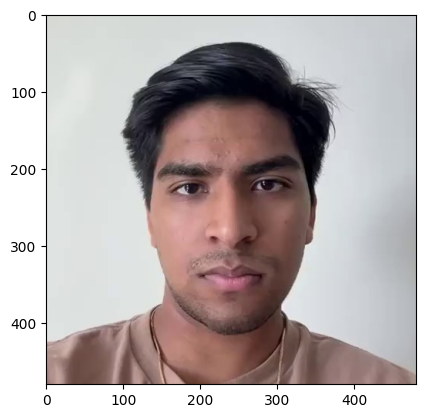

In [ ]:
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img)

In [ ]:
detector = MTCNN()
results = detector.detect_faces(img)

In [ ]:
results

[{'box': [128, 109, 212, 295],
  'confidence': 0.9996882677078247,
  'keypoints': {'nose': [241, 286],
   'mouth_right': [284, 331],
   'right_eye': [288, 221],
   'left_eye': [185, 226],
   'mouth_left': [196, 334]}}]

In [ ]:
x,y,w,h = results[0]['box']

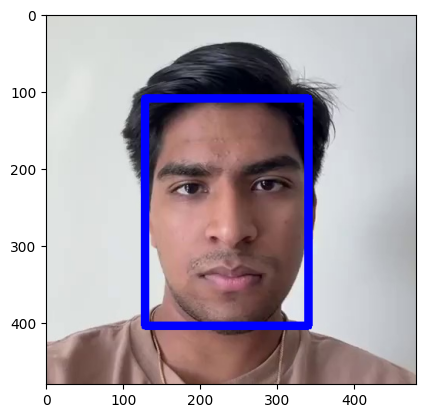

In [ ]:
img = cv.rectangle(img, (x,y), (x+w, y+h), (0,0,255), 10)
plt.imshow(img)


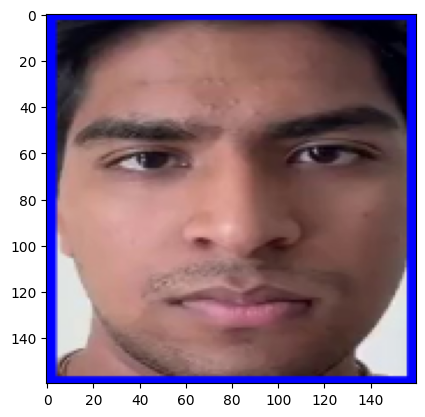

In [ ]:
my_face = img[y:y+h, x:x+w]
my_face = cv.resize(my_face, (160,160))
plt.imshow(my_face)

array([[[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]],

       [[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]],

       [[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]],

       ...,

       [[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]],

       [[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]],

       [[  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255],
        ...,
        [  0,   0, 255],
        [  0,   0, 255],
        [  0,   0, 255]]], dtype=uint8)
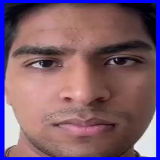

In [ ]:
my_face

In [ ]:
class FACELOADING:
  def __init__(self, directory):
    self.directory = directory
    self.target_size = (160,160)
    self.X = []
    self.Y = []
    self.detector = MTCNN()

  def extract_face(self, filename):
    img = cv.imread(filename)
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    x,y,w,h = self.detector.detect_faces(img)[0]['box']
    x,y = abs(x), abs(y)
    face = img[y:y+h, x:x+w]
    face_arr = cv.resize(face, self.target_size)
    return face_arr

  def load_faces(self, dir):
    FACES = []
    for im_name in os.listdir(dir):
      try:
        path = dir + im_name
        single_face = self.extract_face(path)
        FACES.append(single_face)
      except Exception as e:
        pass
    return FACES


  def load_classes(self):
    for subdir in os.listdir(self.directory):
      path = self.directory + '/' + subdir + '/'
      faces = self.load_faces(path)
      labels = [subdir for _ in range(len(faces))]
      print(f"Loaded successfully: {len(labels)}")
      ##print(f"Loaded successfully: {labels}")
      self.X.extend(faces)
      self.Y.extend(labels)
    return np.asarray(self.X), np.asarray(self.Y)

  def plot_images(self):
    plt.figure(figsize=(10,25))
    for num, image in enumerate(self.X):
      ncols = 3
      nrows = len(self.Y)
      plt.subplot(nrows, ncols, num+1)
      plt.imshow(image)
      plt.axis('off')

In [ ]:
faceloading = FACELOADING("/content/drive/MyDrive/Dataset/Frames_2")
X, Y = faceloading.load_classes()

Loaded successfully: 15
Loaded successfully: 16
Loaded successfully: 15
Loaded successfully: 13
Loaded successfully: 15


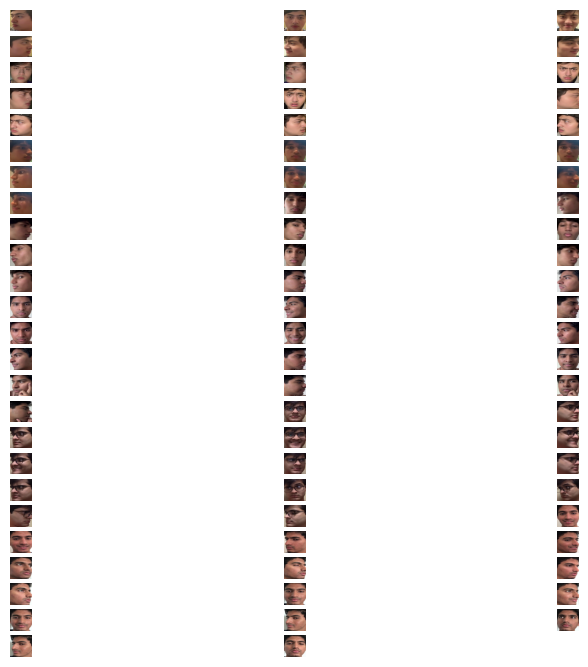

In [ ]:
faceloading.plot_images()

#FaceNet Section


In [ ]:
!pip install keras-facenet

  Preparing metadata (setup.py) ... done
  Created wheel for keras-facenet: filename=keras_facenet-0.3.2-py3-none-any.whl size=10368 sha256=20291e04b14f5f217149ddcd594c4170e27a09d8b9366bbb082077c9277bb479
  Stored in directory: /root/.cache/pip/wheels/1d/d8/a9/85cf04ea29321d2afcb82c0caaafdca9195385f9d68cbc7185
Successfully built keras-facenet


In [ ]:
from keras_facenet import FaceNet
embedder = FaceNet()

def get_embedding(face_img):
  face_img = face_img.astype('float32')
  face_img = np.expand_dims(face_img, axis=0)
  yhat = embedder.embeddings(face_img)
  return yhat[0]

In [ ]:
EMBEDDED_X = []
for face in X:
  EMBEDDED_X.append(get_embedding(face))
EMBEDDED_X = np.asarray(EMBEDDED_X)

1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 280ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 323ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 361ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 329ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 317ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 

In [ ]:
np.savez_compressed('embeddings.npz', EMBEDDED_X, Y)

# SVM Model

In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(Y)
Y = encoder.transform(Y)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(EMBEDDED_X, Y, shuffle = True, random_state=17)

In [ ]:
from sklearn.svm import SVC

model = SVC(kernel='linear', probability=True)
model.fit(X_train, Y_train)


SVC(kernel='linear', probability=True)

In [ ]:
ypreds_train = model.predict(X_train)
ypreds_test = model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

print(accuracy_score(Y_train, ypreds_train))
print(accuracy_score(Y_test, ypreds_test))

1.0
1.0


In [ ]:
t_manush = cv.imread("/content/drive/MyDrive/Dataset/test/manush/manush_3.jpeg")
t_manush = cv.cvtColor(t_manush, cv.COLOR_BGR2RGB)
x,y,w,h = detector.detect_faces(t_manush)[0]['box']


In [ ]:
t_manush = t_manush[y:y+h, x:x+w]
t_manush = cv.resize(t_manush, (160,160))
test_manush = get_embedding(t_manush)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


In [ ]:
test_manush = [test_manush]
ypreds_test_manush = model.predict(test_manush)

In [ ]:
ypreds_test_manush

array([2])

In [ ]:
encoder.inverse_transform(ypreds_test_manush)

array(['Manush'], dtype='<U8')

In [ ]:
# t_random = cv.imread("/content/drive/MyDrive/Dataset/test/Random/RDJ.jpeg")
# t_random = cv.cvtColor(t_random, cv.COLOR_BGR2RGB)
# x,y,w,h = detector.detect_faces(t_random)[0]['box']
# t_random = t_random[y:y+h, x:x+w]
# t_random = cv.resize(t_random, (160,160))
# test_random = get_embedding(t_random)
# test_random = [test_random]
# ypreds_test_random = model.predict(test_random)
# encoder.inverse_transform(ypreds_test_random)

In [ ]:
t_sami = cv.imread("/content/drive/MyDrive/Dataset/test/sami/sami_3.jpg")
t_sami = cv.cvtColor(t_sami, cv.COLOR_BGR2RGB)
x,y,w,h = detector.detect_faces(t_sami)[0]['box']
t_sami = t_sami[y:y+h, x:x+w]
t_sami = cv.resize(t_sami, (160,160))
test_sami = get_embedding(t_sami)
test_sami = [test_sami]
ypreds_test_sami = model.predict(test_sami)
encoder.inverse_transform(ypreds_test_sami)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


array(['Sami'], dtype='<U8')

In [ ]:
def predict_face(image_path, detector, encoder, model):
  """
  Predicts the person in an image using a pre-trained face recognition model.

  Args:
      image_path: The path to the image file.
      detector: The face detector object (e.g., MTCNN).
      encoder: The label encoder object.
      model: The trained face recognition model (e.g., SVC).

  Returns:
      The predicted name of the person in the image.
  """
  img = cv.imread(image_path)
  img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
  x, y, w, h = detector.detect_faces(img)[0]['box']
  img = img[y:y + h, x:x + w]
  img = cv.resize(img, (160, 160))
  embedding = get_embedding(img)
  embedding = [embedding]
  prediction = model.predict(embedding)
  predicted_name = encoder.inverse_transform(prediction)[0]
  return prediction[0], predicted_name

In [ ]:
predicted_label, predicted_name = predict_face("/content/drive/MyDrive/Dataset/test/sami/sami_3.jpg", detector, encoder, model)
predicted_label, predicted_name

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step


(3, 'Sami')

In [ ]:
# prompt: a function that calls predict_face with all the images from test folder which has folders inside it that hold the actual image and the folders that hold the image are the actual names
def predict_all_faces_in_test_folder(test_folder_path, detector, encoder, model):
  """
  Predicts faces in all images within subfolders of a test folder.

  Args:
      test_folder_path: Path to the test folder.
      detector: The face detector object.
      encoder: The label encoder object.
      model: The trained face recognition model.

  Returns:
      A dictionary where keys are image paths and values are tuples of
      (predicted_label, predicted_name).
  """
  results = {}
  for person_folder in os.listdir(test_folder_path):
      person_folder_path = os.path.join(test_folder_path, person_folder)
      if os.path.isdir(person_folder_path):
          actual_name = person_folder
          print(f"Processing images in folder: {person_folder}")
          for image_file in os.listdir(person_folder_path):
              image_path = os.path.join(person_folder_path, image_file)
              try:
                  predicted_label, predicted_name = predict_face(image_path, detector, encoder, model)
                  results[image_path] = (predicted_label, predicted_name, actual_name)
              except Exception as e:
                  print(f"Error processing {image_path}: {e}")
                  results[image_path] = ("Error", "Error", actual_name) # Store error info
  return results

In [ ]:
# Example usage (assuming you have defined predict_face, detector, encoder, and model):
test_folder = "/content/drive/MyDrive/Dataset/test"
predictions = predict_all_faces_in_test_folder(test_folder, detector, encoder, model)
print(predictions)

quantitative_metrics = {}
for image_path, (predicted_label, predicted_name, actual_name) in predictions.items():
    print(f"Image: {image_path}, Predicted Label: {predicted_label}, Predicted Name: {predicted_name}, Actual Name: {actual_name}")
    predicted_name = predicted_name.lower().strip()
    if actual_name not in quantitative_metrics:
        quantitative_metrics[actual_name] = {'TP': 0, 'TN': 0, 'FP': 0, 'FN': 0}

    if predicted_name == actual_name:
      quantitative_metrics[actual_name]['TP'] += 1
    else:
      quantitative_metrics[actual_name]['FP'] += 1
      quantitative_metrics[actual_name]['FN'] += 1

print(quantitative_metrics)

Processing images in folder: shan
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
Processing images in folder: aakash
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
Processing images in folder: akshara
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
Processing images in folder: sami
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
Processing images in folder: manush
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
{'/content/drive/MyDrive/Dataset/test/shan/shan_2.jp

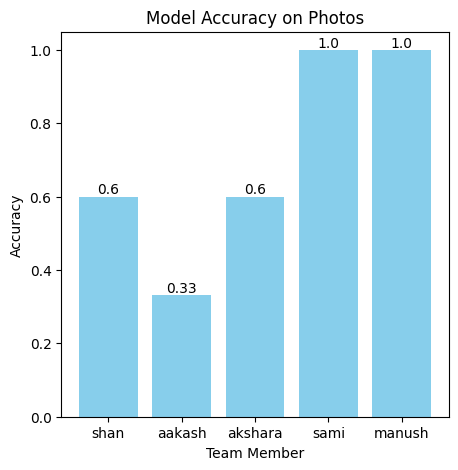

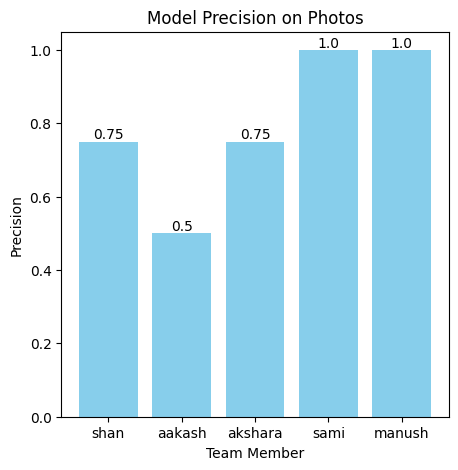

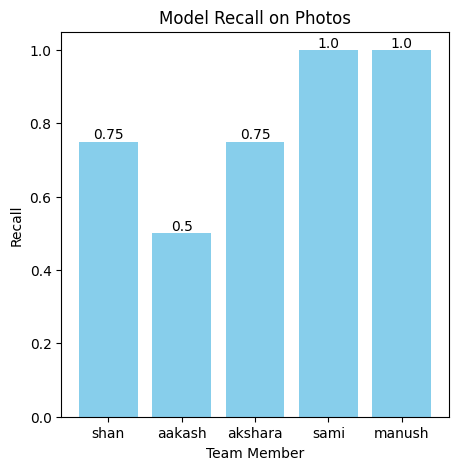

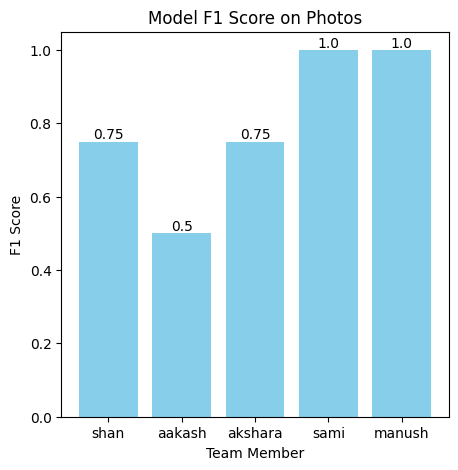

In [ ]:
import matplotlib.pyplot as plt

for team_member in quantitative_metrics:
    TP = quantitative_metrics[team_member]['TP']
    TN = quantitative_metrics[team_member]['TN']
    FP = quantitative_metrics[team_member]['FP']
    FN = quantitative_metrics[team_member]['FN']

    accuracy = (TP + TN) / (TP + TN + FP + FN)
    precision = TP / (TP + FP)
    recall = TP / (TP + FN)
    f1_score = 2 * (precision * recall) / (precision + recall)

    quantitative_metrics[team_member]['Accuracy'] = accuracy
    quantitative_metrics[team_member]['Precision'] = precision
    quantitative_metrics[team_member]['Recall'] = recall
    quantitative_metrics[team_member]['F1 Score'] = f1_score

for quantitative_metric in ['Accuracy', 'Precision', 'Recall', 'F1 Score']:
  categories = list(quantitative_metrics.keys())
  values = [inner_dict.get(quantitative_metric) for inner_dict in quantitative_metrics.values()]

  plt.figure(figsize=(5, 5))
  bars = plt.bar(categories, values, color='skyblue')

  for bar in bars:
      yval = round(bar.get_height(), 2)
      plt.text(
          bar.get_x() + bar.get_width() / 2, yval, f'{yval}',
          ha='center', va='bottom'
      )

  plt.xlabel('Team Member')
  plt.ylabel(quantitative_metric)
  plt.title('Model ' + quantitative_metric + ' on Photos')

  plt.show()